# Stock sentiment Analysis using newsHeadlines

## About the problem and the dataset information

## The data set in consideration is a combination of the world news and stock price shifts.
## Data ranges from 2008 to 2016 and the data from 2000 to 2008 was scrapped from Yahoo finance.
## There are 25 columns of top news headlines for each day in the data frame.
## Class 1- the stock price increased.
## Class 0- the stock price stayed the same or decreased.

# About the approach.

# Used TF-IDF and Bag of Words for extracting featues from the headlines.
# Used SVM,Decision tree,Random Forest Classifier, Multinational Naive Bayes and Passive Aggressive Classifier for analysis.

# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import nltk
from nltk import PorterStemmer
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanishkab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
pwd()

'C:\\Users\\kanishkab\\Downloads'

# Importing the dataset

In [5]:
df=pd.read_csv("Stock_Dataa.csv", encoding = "ISO-8859-1")

In [6]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [7]:
df.tail()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
4096,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
4097,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
4098,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
4099,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
4100,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates 

In [8]:
df.shape

(4101, 27)

In [9]:
stock_inc=df[df['Label']==1]
stock_dec=df[df['Label']==0]

In [10]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']
train.shape

(3975, 27)

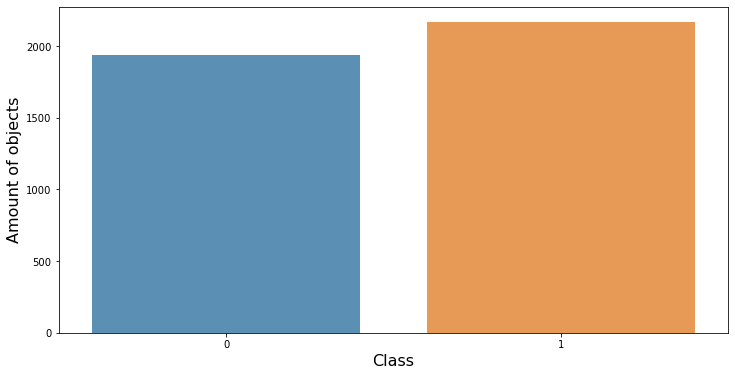

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(df.Label.value_counts().index, df.Label.value_counts().values, alpha=0.8)
plt.ylabel('Amount of objects', fontsize=16)
plt.xlabel('Class', fontsize=16)
plt.show();

In [12]:
df['Label'].value_counts()

1    2166
0    1935
Name: Label, dtype: int64

# Text preprocessing

In [13]:
#Removing punctuations 
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]", " ",regex=True, inplace=True)

In [14]:
data.columns

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [15]:
for col in data.columns:
    data[col]=data[col].str.lower()
data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [16]:
' '.join(str(x) for x in data.iloc[1,0:25])

'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite'

In [17]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [18]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [19]:
len(headlines)

3975

# Removing stopwords

In [20]:
from nltk.corpus import stopwords
new_headlines= headlines[:] #make a copy of the word_list
for word in new_headlines: # iterate over word_list
    if word in stopwords.words('english'): 
         new_headlines.remove(word) # remove word from filtered_word_list if it is a stopword

# Tokenization and lemmitization

In [21]:
# Tokenize lists

results2 = [line.split() for line in new_headlines]

# Lemmatize each word from a list using WordNetLemmatizer

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
final_headlines = []
for i in range(0, len(results2)):
     l1 = results2[i]
l2 = ' '.join([lemmatizer.lemmatize(word) for word in l1])
final_headlines.append(l2)
final_headlines[0]

'microsoft corp said on wednesday it will begin warning user of it outlook com email service when the company suspect that a government ha been trying to hack into their account greek orthodox church homosexual are god s creation the church doesn t reject people vladmir putin officially dissolve roscosmos the russian space agency and will restructure it a a state run corporation starting january donald trump could be refused entry to the uk after the home secretary theresa may said she will ban people that are non conducive to the public good the petition to ban him ha over half million signature saudi arabia say it ready to meet any additional oil demand we will satisfy the demand of our customer we no longer limit production if there is demand we will respond we have the capacity to respond to demand saudi oil minister said new year firework and festivity have been cancelled in the belgian capital brussels because of terror alert new specie of human may have shared our cave amp bed c

# WordCloud

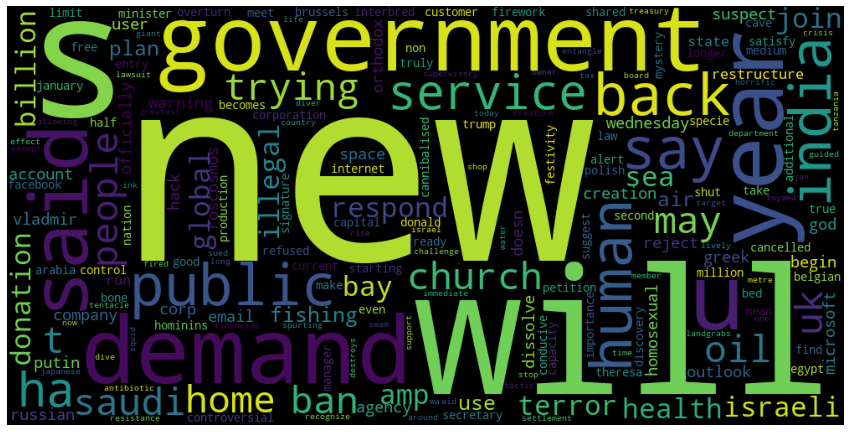

In [22]:

import matplotlib.pyplot as plt

#convert list to string and generate
unique_string=(" ").join(final_headlines)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [23]:
# Converting words to vector using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [24]:
## implement BAG OF WORDS

countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [76]:
train['Label']

0       0
1       0
2       0
3       1
4       1
       ..
3970    0
3971    0
3972    1
3973    0
3974    0
Name: Label, Length: 3975, dtype: int64

In [79]:
headlines

['a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title',
 'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main

# Random Forest Classifier

In [25]:
# implement RandomForest Classifier

randomclassifier=RandomForestClassifier(n_estimators=400,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [26]:
## Predict for the Test Dataset

test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions1 = randomclassifier.predict(test_dataset)

In [27]:
## Import library to check accuracy

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [28]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[139  47]
 [  6 186]]
0.8597883597883598
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       186
           1       0.80      0.97      0.88       192

    accuracy                           0.86       378
   macro avg       0.88      0.86      0.86       378
weighted avg       0.88      0.86      0.86       378



In [29]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


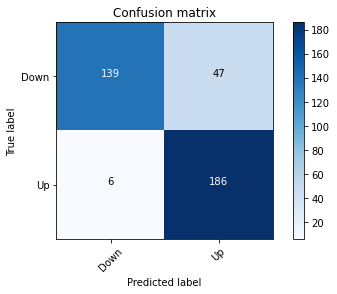

In [30]:
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# Support Vector machines

In [31]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(traindataset,train['Label'])

SVC()

In [32]:
predictions2 = svc.predict(test_dataset)

In [33]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



Confusion matrix, without normalization


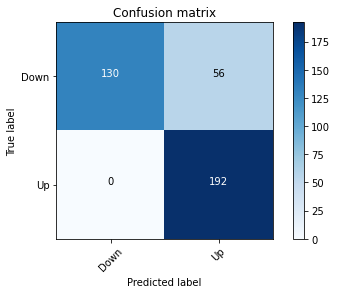

In [34]:
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(traindataset,train['Label'])
predictions3 = clf.predict(test_dataset)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[138  48]
 [ 10 182]]
0.8465608465608465
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       186
           1       0.79      0.95      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.85      0.84       378



Confusion matrix, without normalization


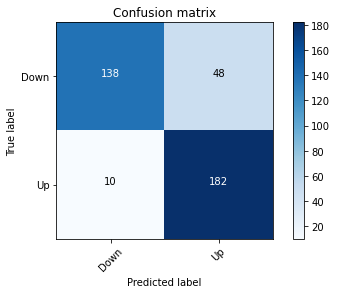

In [36]:
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# XgBoost

In [37]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(traindataset,train['Label'])

predictions4 = model.predict(test_dataset)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[21:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[150  36]
 [ 36 156]]
0.8095238095238095
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       186
           1       0.81      0.81      0.81       192

    accuracy                           0.81       378
   macro avg       0.81      0.81      0.81       378
weighted avg       0.81      0.81      0.81       378



Confusion matrix, without normalization


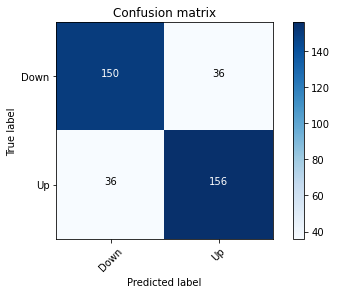

In [38]:
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# Decision Tree 

In [39]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(traindataset,train['Label'])

predictions = clf.predict(test_dataset)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[156  30]
 [ 36 156]]
0.8253968253968254
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       186
           1       0.84      0.81      0.83       192

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378



Confusion matrix, without normalization


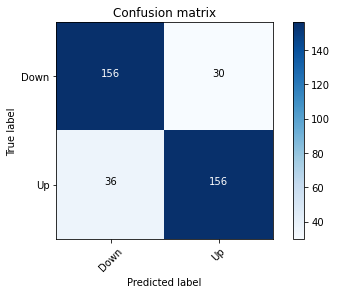

In [40]:
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# Passive Aggressve classifier

In [41]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier()
clf.fit(traindataset,train['Label'])

predictions = clf.predict(test_dataset)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[159  27]
 [ 32 160]]
0.843915343915344
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       186
           1       0.86      0.83      0.84       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378



Confusion matrix, without normalization


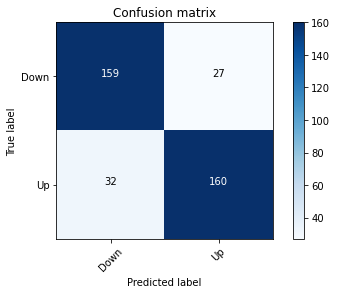

In [42]:
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# Feature Extraction and then making the model

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

#implement TF-IDF
tfvector=TfidfVectorizer(ngram_range=(2,3))
train_df=tfvector.fit_transform(headlines)

test_dataset = tfvector.transform(test_transform)

# Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(train_df,train['Label'])
predictions = clf.predict(test_dataset)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



Confusion matrix, without normalization


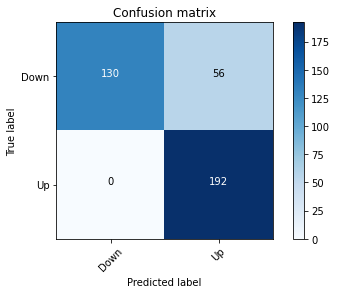

In [45]:
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# Passive Aggressive Classifier

In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier()
clf.fit(train_df,train['Label'])

predictions = clf.predict(test_dataset)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[145  41]
 [ 14 178]]
0.8544973544973545
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       186
           1       0.81      0.93      0.87       192

    accuracy                           0.85       378
   macro avg       0.86      0.85      0.85       378
weighted avg       0.86      0.85      0.85       378



Confusion matrix, without normalization


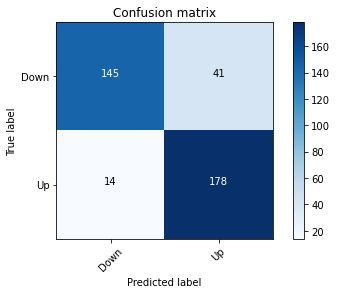

In [47]:
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# Decision Tree

In [48]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_df,train['Label'])

predictions = clf.predict(test_dataset)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)


[[145  41]
 [ 45 147]]
0.7724867724867724
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       186
           1       0.78      0.77      0.77       192

    accuracy                           0.77       378
   macro avg       0.77      0.77      0.77       378
weighted avg       0.77      0.77      0.77       378



Confusion matrix, without normalization


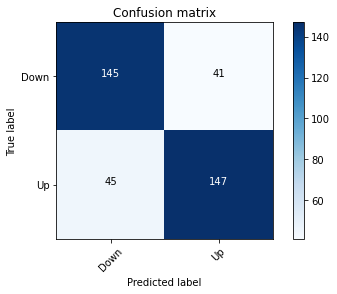

In [49]:
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# Support Vector Machines

In [50]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(train_df,train['Label'])

predictions = svc.predict(test_dataset)

## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



Confusion matrix, without normalization


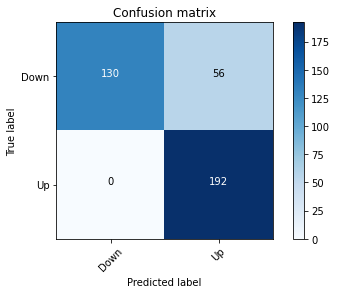

In [51]:
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_df,train['Label'])

LogisticRegression()

In [72]:
train_df

<3975x1553543 sparse matrix of type '<class 'numpy.float64'>'
	with 2167855 stored elements in Compressed Sparse Row format>

In [60]:
predictions = logreg.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



In [62]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [64]:
import pickle
# Save trained model to file`
pickle.dump(logreg, open("stock.pkl", "wb"))
pickle.dump(tfvector, open("tfvector.pkl", "wb"))

In [65]:
loaded_model = pickle.load(open("stock.pkl", "rb"))
loaded_model.predict(test_dataset)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [80]:
import re
def new_headline(new_headline):
    new_headline= new_headline
    new_headline = re.sub('[^a-zA-Z]', ' ', new_headline)
    new_headline = new_headline.lower()
    new_headline = new_headline.split()
    lemmatizer = WordNetLemmatizer()
    new_headline = [lemmatizer.lemmatize(word) for word in new_headline if not word in stopwords.words('english')]
    new_headline = ' '.join(new_headline)
    new_corpus = [new_headline]
    new_X_test = tfvector.transform(new_corpus).toarray()
    new_y_pred = loaded_model.predict(new_X_test)

    return new_y_pred
new_headline = new_headline(str(input("Enter new headline...")))
if new_headline[0]==1:
    print("the stock price increased")
else :
    print("the stock price stayed the same or decreased")

Enter new headline...pilgrim knows how to progress thatcher facing ban mcilroy calls for irish fighting spirit leicester bin stadium blueprint united braced for mexican wave auntie back in fashion  even if the dress looks a bit tatty shoaib appeal goes to the top hussain hurt by  shambles  but lays blame on earlier damage england s decade of disasters revenge is sweet for jubilant cronje our choice  not theirs profile of former us nazi party officer william pierce new evidence shows record of war crimes suspect was not investigated the rise of the supernerds written on the body putin admits yeltsin quit to give him a head start bbc worst hit as digital tv begins to bite how much can you pay for    christmas glitches upending a table  chopping a line and scoring a goal scientific evidence  unreliable   defence claims fusco wins judicial review in extradition case rebels thwart russian advance blair orders shake up of failing nhs lessons of law s hard heart
the stock price increased


In [67]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

# Conclusion 
# OVERALL ACCURACY= 85

# WE CAN SEE THAT NAIVE BAYES CLASSIFIER AND SUPPORT VECTOR MACHINES WITH TF-IDF VECTORIZER IS GIVING THE HIGHEST ACCURACY i.e 85
# IN BOTH THE MODELS THE FALSE NEGATIVE IS 0 AND FALSE POSITIVE IS TOO LESS.IN MY OPINION BOTH THE MODELS ARE DOING CORRECT CLASSIFICATION